In [13]:
import numpy as np
import networkx as nx
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [139]:

class RGraph():
    def __init__(self, num_location, num_home, starting_location):
        self.num_location = num_location
        self.num_home = num_home
        self.starting_location = starting_location
        self.edge_matrix = np.zeros((self.num_location, self.num_location))
        self.visited = {}
        self.locations = [starting_location]
        self.homes = []

    def check_if_connected(self):
        return all([value for value in self.visited.values()])

    def dfs(self, i):
        self.visited[i] = True
        for j in range(self.num_location):
            if self.edge_matrix[i][j] != 0 and not self.visited[j]:
                self.dfs(j)


    def generate_random_edge(self):
        return np.around(np.random.uniform(500000000,1000000000), 5)
    def random_input_generator(self):

        p1 = 0.8
        p2 = 0.6
        p3 = 0.2
        for i in range(self.num_location-1):
            self.locations.append("location{}".format(i+1))

        for i in range(self.num_location):
            for j in range(self.num_location):
                if j > i or i == j :
                    continue
                if np.random.uniform(0,1) < p1:
                    if np.random.uniform(0,1) < p2:
                        rand_num = self.generate_random_edge()
                        self.edge_matrix[i][j], self.edge_matrix[j][i] = rand_num, rand_num
                        if np.random.exponential(0.5) < p3:
                            self.edge_matrix[i][j], self.edge_matrix[j][i] = 0, 0
                            indexi = round(np.random.uniform(0,self.num_location))
                            indexj = round(np.random.uniform(0,self.num_location))
                            self.edge_matrix[indexi-1][indexj-1], self.edge_matrix[indexj-1][indexi-1] = 0, 0

        # check if the graph is connected
        self.visited = dict([(i, False) for i in range(self.num_location)])
        self.dfs(0)
        if self.check_if_connected():
            print('connected')
        else:
            print('not connected')

        self.homes = self.locations.copy()[1:self.num_home+1]
        np.random.shuffle(self.homes)

        self.generate_input()

    def generate_input(self):
        print(self.num_location)
        print(self.num_home)

        [print(v, end =  ' ') for v in self.locations]
        print()
        [print(h, end =  ' ') for h in self.homes]
        print()
        print(self.starting_location)
        for i in range(self.num_location):
            for j in range(self.num_location):
                if self.edge_matrix[i][j] == 0:
                    print("x", end = ' ')
                else:
                    print(str(self.edge_matrix[i][j]), end = ' ')
            print()
            
    def generate_output(self):
        print("Soda")
        print(1)
        print("Soda", end = ' ')
        for h in self.homes:
            print(h, end = ' ')
        

In [143]:
g = RGraph(200, 100, "Soda")
g.random_input_generator()

connected
200
100
Soda location1 location2 location3 location4 location5 location6 location7 location8 location9 location10 location11 location12 location13 location14 location15 location16 location17 location18 location19 location20 location21 location22 location23 location24 location25 location26 location27 location28 location29 location30 location31 location32 location33 location34 location35 location36 location37 location38 location39 location40 location41 location42 location43 location44 location45 location46 location47 location48 location49 location50 location51 location52 location53 location54 location55 location56 location57 location58 location59 location60 location61 location62 location63 location64 location65 location66 location67 location68 location69 location70 location71 location72 location73 location74 location75 location76 location77 location78 location79 location80 location81 location82 location83 location84 location85 location86 location87 location88 location89 locatio

x x 853916237.98798 x x 936306451.85607 x x 600731845.89599 x x x x x 782226295.86409 x x x 956642700.77002 819236234.24348 x 697666962.91638 805778849.1429 x x x x x x x x x x x x x x x x x x 603312922.91706 x x x x x 729946657.51702 771085220.44545 x x x x 657936821.4062 x x x 775460533.27369 x x 697291845.1812 x x x x x x x x x x x x x x x x x x 571094157.20404 x x x x 533451859.53279 x 520978186.53191 x x x x x x 541623204.12771 635152973.11761 520925779.12294 552972445.70351 x x x x 538661928.23292 682172777.06105 x x x x x x x x 647824842.83546 x 744271694.64118 x x x 698213245.04424 706982236.78873 x 590898266.52777 x 936630919.54257 x x x x x x x 918554031.13911 x 799578520.05436 x 519640295.45702 x x x 869900845.87988 940826035.14475 x x 834944064.83777 723409757.84448 638142318.37835 x x 949904342.78237 x x 725030237.6607 x x x x x 565706698.03108 x 936814453.94245 x x 710222001.88472 992471873.67934 x 898431105.12762 x 659159946.34968 x 897430254.58422 x x x x x 508158283.42

x x x x 711290614.12444 543802825.44487 x x x x x x x 652100406.73096 x x x x 673279949.84492 x 684994274.25199 x x x x 949104786.20883 x x x x x 644737468.40787 x x x x x x x x x x x 545358682.372 x 825153382.88074 x x x 889637966.5372 x 980647689.22138 x 769355098.67484 x x x x 614900803.5747 x x x x x 913303194.3858 x 911930714.82691 x x x x x x 748140156.39924 x x 871619490.68575 x 689120628.96074 x x x x 584071590.82214 x x x x x x x 671543905.24959 x x x x x 796148500.08628 x x x x x x x 744516067.82375 x x x 945487485.25241 x x 951480050.91781 639062878.96779 x x x x x 585698198.24579 x x x x x x x x x x 816164962.78767 x 837855785.97324 x 618817899.41923 x 626037019.53545 827758499.66864 x x x x x x x x 850855204.97544 x x 642172755.45241 x x x x 915558343.43687 x 510321536.67141 560285197.00774 x x 607152129.56761 791344835.88065 823863950.15218 568075438.85363 784747461.07745 x 759281748.56435 x x x x x x 626218268.07318 x 603735741.27585 x x x x x x 766975609.74979 x x x x x

x x x x x 629776922.48075 x x 563829134.95966 x x x x x 606435067.57921 x 979538749.46149 855468090.84518 x 900008012.84761 921332200.97783 x 912922160.30119 x x x x 594697850.23652 811386336.68292 x 637259032.6829 964466677.189 x x x 926330988.44674 x x 587259398.01982 x x x x x x 856749526.06908 x x 699887026.25712 x 939102500.3167 907854503.57267 796882043.37987 x x x 911408666.8471 x x 838452767.8417 977211557.78209 x x x x x x 693310376.40091 x x 597049813.31349 864272391.00221 612376222.45177 x x 777493519.86378 x x x x 611946934.94337 718619875.02271 x 974524672.48731 641040756.61746 x x x x x x x x 594762199.7485 x x x 537386635.27488 x 808738140.17241 x 558844497.6492 x x x x 629337398.04801 x 996034813.96564 x x 696354021.3457 x x x x x x x x x x x x x x x x 583861080.08601 x 626028997.40071 590361936.4716 761138725.15547 x x 687250292.38853 x x 591346744.36367 656408464.56827 868500039.62217 762702073.17828 x 525236041.91981 x x x x 510072233.24333 x x x x 918126519.73702 60

x 689369153.23242 520080516.74588 991706717.01498 622815687.95925 x x x x x 502999087.92987 566495933.38769 787444675.48773 x 762177215.84781 x x x 617958754.14624 x 526533010.45733 x x 540995817.76652 x 778531851.98558 x 992471248.75588 x x x x x 977396490.10221 x 860085413.80192 968063141.45097 x 587161058.89324 960298607.3832 x x x x x x x x x x 927576617.73208 x x x 584245183.71368 x x 976690079.33392 926824871.23615 x x x x x x x 616915537.31243 x x x 639258506.05651 x x 587088354.9631 x x 954227204.30674 507322024.50456 x x x x x x x x 636659694.03672 x 571687708.55498 x 672404863.86613 x x x x x 857167036.36417 732786642.70723 x x 978228671.32978 634066756.80246 730203623.8888 x x x 885171675.72742 x 866168932.9528 x x x x 613890485.60047 x 821169800.249 x 747712042.44955 860494446.42914 620047606.85132 x x x x x 631758400.22715 x 899986860.68314 x x x 831669231.68421 x x x x x x 677633234.27437 x x x x x x x 707716958.29129 x x x x x 573978689.24274 733190250.86586 x x x x 8085

742415911.29621 x 821030797.51699 x x x x 718740032.44422 x x x x x x x 545358682.372 x x x x x x 715548206.75927 x x 519495828.76306 785643919.83695 x x 667428938.23645 x x x 543888631.34153 x x x 996774341.58168 838867111.97529 553791312.50738 x x x x 585441605.0056 903896608.86233 880971135.63583 x x x 719350013.67529 x x x 585427983.881 643638034.61292 x 747870571.89875 x 572912531.12654 x 938769630.84753 x 622666847.87885 x x x x 784594455.04696 x x x 917597196.4882 x x 816478912.81496 757718887.12029 549389649.66531 x x x x x x x 784742689.26982 x x 623333295.1066 x x x x x x x 707761118.93257 x x x 722059301.73659 588343588.87371 950345967.97137 615860814.46181 x x x 504767168.10019 x x x x 598926447.55754 x x x x x x x x 669184096.55374 x x 770059467.2913 x 847223438.05947 x 700511094.28926 x x x 560880069.92154 x 860831955.54514 x x x x x 504265485.37443 880241071.56979 x x x x x x 812109789.74388 x 934035784.00155 x x 973575344.71632 x x x x 576074002.40704 x x x x x 81690704

x x 906582915.03414 x x 828851810.59747 x 551392589.94134 x x 500930258.7349 x x x x 980647689.22138 809744171.50481 x x x x 823464344.576 x x 907854503.57267 x 803592412.56217 x x x x x 984663915.86206 x x 662678039.17362 x x x x x x 690187625.21117 x x x 927292725.97301 x x x x x x x x x x x 784827482.5042 882186777.29316 x x x 882885253.10601 x 669584473.72428 600194510.32249 x x x x x 630832366.87066 x x x x 753523625.16686 x x x x x x x x 748138997.94128 x x x x x x 681072847.06741 921726039.6776 790648454.47628 610857781.52789 x 713126801.93011 x x x 942406032.46085 x x x 896091190.86577 x x 785829375.50973 x x 838702076.18236 x x x x x x x x 791162041.89676 x 790975254.69356 949718706.95874 x x 686510248.8598 977830973.42594 812885020.05545 x x x x 691825403.95217 781622591.02666 554233566.71502 x x x 607722195.4869 694866630.73562 x x x x x 618504292.89591 782239804.45928 x x x x x x x 752643083.40077 726673979.46478 x 906056893.83429 708181947.43962 x x 909357715.12439 8573232

861196299.80811 745551858.14916 x x x x x x x x x 985185386.6965 x x x x x x 732498014.14982 x 991546903.64758 x 620984613.76821 546098886.08969 x x x x x x x 695920197.97845 x 665204923.49545 x x 704932741.0157 x x x x 607801312.12099 x 938769630.84753 x x x x 579766340.40344 982089390.29909 x x x x x x x x x x 587774615.28578 x x x x x x 662425256.03034 x x x x x x x x 670663412.47924 x x 812359570.01399 971866430.2394 x x 727283760.29962 614551313.99111 x 981765010.8867 x x x x 609129730.90893 903635302.35433 862153420.71034 x x x x x 793754425.73823 569071963.88986 x x 967373460.59278 536200358.35655 x x 946626795.32561 x 817659939.60542 x 681830832.56764 839817130.08034 x x x x x x x 860987786.38613 x 592861076.32885 x x x 998658489.05232 x x x x x 929028950.58275 x x x x x x x x x x 711862697.13149 x x x x 900144180.48308 x x x x x x 715296952.11118 956355821.97845 716026637.38682 x x x x x x 973659281.70826 604793999.4491 x 647771772.01525 x 995750870.72351 x 944575754.97188 x x

x x x x x x x x x x 788752714.9 576075253.81185 x 998920835.18221 x x x x 798214824.24729 x x x x x x x x x 714249303.04774 x x 769018602.37122 x x x 643519308.40165 536876498.31454 x 837329645.4702 847316990.84462 618912315.69543 x x x 505150899.31653 x x 661389184.59849 548198404.65935 x x x x 592483140.62065 x 515181094.61308 x x x x x x 645712890.77299 x 606016376.52331 x x x x x x x 698533698.78232 x 759455492.38154 x x x x x 950269142.6175 874539386.48305 x x x 614097448.88971 956884952.05859 642818265.84086 871252917.20842 633127084.02888 530136272.63984 636080631.12302 x x x x 746798141.98885 x 802315700.25932 743155081.62371 x x x x x x 691756032.7609 x x 959753356.17296 726835754.9478 x x x x x 690030077.75134 960376596.63822 842039953.19282 x x x 730693229.18134 x 694399233.79831 x x x x x x x x x x x x x x 815681058.36942 x x x x 896796231.12231 x x x x x 604138976.05972 x 887789608.12307 x 856787177.76863 622184441.07972 x x 954842886.0305 951807930.80635 x x x 944168468.9

x x 944270166.1976 x x x x x x x x 971355266.62204 x x x 689120628.96074 844878432.21907 x 765519951.42749 x x 718125128.42424 x x x x x x x x x x x x x x x 892022053.35604 x x 599171144.59062 648925391.40209 835318216.91727 x x x x 713515712.69813 x x 596687198.72798 x x 975862958.00909 x 983072220.36528 x x 868368237.72293 x 517087722.98887 x x x 972910783.95286 763434835.60283 x x 945059944.80783 x 564246882.11501 x x x 984609259.17187 587055580.19443 508577212.52344 x x x x x x x x 675154242.18861 570270862.02018 x x x x 598620226.17331 988277365.76193 x 696283862.53895 x 943986916.70176 x 642800998.06491 x x x x x x x 578470127.36366 x x x x x x x x 919322592.92578 836402161.7613 x 832771241.71714 x x x x 876383655.70531 816878584.1262 x x x 542271384.17925 692058333.35717 x x x 800526304.56388 785980818.53622 x 852331241.99372 610824053.04158 x 904764105.41558 x x x x x x x x x x x x 956252137.64196 x x x 514831364.0652 761370744.51617 879529692.17674 591592869.06361 x x x x x x 

x x x x x 932921907.88788 x x 811367588.64057 x 669713709.63865 711349174.95864 x x x x x x x x 945819523.68275 763455516.92088 x x x 601209468.66985 845068707.34889 x x x x x x x x x x x x x x x x x x x x x x x 729201562.73015 x 780376328.5085 797156869.97806 x x 551881050.69087 x x x x x x 681543758.72628 x 861739818.18267 881360404.85222 917048470.95882 667247982.30279 642818265.84086 x 514938435.84464 x x x x x 996580921.92104 x 500034223.92416 558960781.20471 x x 836400331.8104 x x x x 761933653.02538 x x x 540096110.21864 720014991.98082 x x x 762611038.3686 971743759.86835 851547580.59746 x x x x x x x x x x x x x x x x x x x x x x x x x 972567112.66321 x x 890351005.9186 x x x x x x x x 706064909.55736 892557182.85677 x x x x x x x 889372056.8323 x x x x 761239971.65428 565818743.14329 x 854284584.49082 x x x 734637519.87156 x 712687253.05807 x x 616121429.06769 x 887042986.37608 x x x x x x x 585045464.60697 775767505.7519 x x x 638712360.94412 x 996961769.69359 676146859.7739

x x x x x x x 983804623.04552 902569713.44544 x x x x x x x x x 815759212.46457 650256078.89517 x x x 920507947.16236 x 981074790.66927 x x x x x 755460416.04951 x 530583049.84371 x x 586973914.72865 x x x 727855267.88448 x x x 678584393.37913 x 674497167.67112 x 628802609.91891 x x 713126801.93011 x 748092362.93048 547037692.47652 x x x 573139912.76307 800145188.39319 862050579.32737 x 611991583.3471 x x 941906389.8604 x x x 802315700.25932 x 519490555.97351 x x 627309300.83229 x x x 642800998.06491 x x 928653720.68743 x x x x x 971743759.86835 x x x x 835981142.54454 x x x x 755718656.49551 x x x x x 666044617.91793 812251362.12924 x x x x x x 986154446.07274 602166717.48165 711520775.84215 x 618607470.93256 x 553428184.88675 x x x 951746742.23489 x x x x 935823237.89875 x x x x x x x x 850561068.33074 x x x x 799239416.18701 x 966298907.86818 x x x x 756679357.33987 x x 815370295.3975 740421864.8577 x x x x x x x x 773548191.74195 x x x x x x 883793944.01033 x 523014317.56759 x x x 

x x x 672029709.57191 x 971577408.57057 x x x 641569143.28826 x x 941905542.15264 x 665170918.19327 x 840372035.76784 x x x 745827994.85378 x 683703253.06058 x x x x x x x x x x x x x x 689215007.50201 x 517661687.02233 x x x x x x 645543283.19222 583800476.12992 574394131.89808 x 858621745.37775 x 775588896.03663 820109086.66299 x x x 809114702.64666 x 720878458.72188 x x 582278289.02667 718116000.12477 x x 963814338.80437 x x 726835754.9478 x x x x x x x 709709784.90397 x x 836833309.72282 871438552.88844 x x x x x x x 813047635.95299 x 669274938.58434 795407282.46216 816657080.35404 812916957.92478 x x x x 526268062.54542 x x x x 565485191.49748 812211496.34606 908577960.78393 608830221.92522 x 957733370.22175 x x 702319824.45078 x x x 696186582.59079 909083710.27418 x 704893257.56261 606207653.58739 908466287.01442 x x 675652096.55509 x 910383145.36083 x 969979908.91807 x x 775198622.6022 x 598700458.73223 x x x x x x x x 576604808.54143 x x 933793949.55598 x 585455191.08876 x x 65

x x 556830135.14734 x x x 590898266.52777 824471009.74925 551349838.24692 x x x x x x x 925018320.03637 697753981.15084 x x x x x x x 519094626.89967 x x x x x x x x x x x x x 820490177.22022 x 669289271.29038 x x x x x x x x 959914589.19906 x x x x x x x x 571846959.42171 x 860987786.38613 x x x 776947245.66036 586985837.17685 647574773.61237 702742389.29157 x x 810896928.50335 x x x x x x x x 555685690.17761 x x x x 703977916.18769 768499779.51283 x 849942706.95411 x 558646352.96076 x x x 804940067.93645 905487259.25549 648771981.87221 x x 644635898.50037 x x x 917365673.27851 x x x 546120463.26484 x x 606207653.58739 x x x x x 940177262.00835 x x x x x x x 661164970.85355 x x 919233323.24906 x x x x 697406024.16352 x x x 523979494.91307 x x x x 544647503.86448 913991714.17467 x 952571428.75822 x 855766717.10068 x x 608211987.18418 x x x 774704103.405 x x x x x x 525612687.12643 508935203.43986 x 988447645.31167 850219636.31982 x x 999388681.61255 x x x x x 836111606.44874 x x x x 65

x x x x x x x x 677163782.32716 662401280.56259 x x 571186401.80587 x x x x 989877622.40123 x x x 954083037.39587 502063421.17119 x x x x 910114736.1519 x x 911287806.58558 x x x x x 870203021.57559 543435505.00851 x x x x 504195600.25876 x x x x x 928698271.86596 x 745737447.0623 812885020.05545 x x x 970576930.17724 x x x 966195608.96437 732517464.21267 x x x x x x x x x 634436603.55446 517594006.62878 x x 737503495.10536 x 514149608.82926 x 692058333.35717 x x 937421650.88733 x x x x 587113999.63834 x x x x x x x 871583573.49041 x 642640070.08492 x x x x 963759311.55343 x x x x 941146332.71681 x 870544877.70831 878150277.74069 x 791411087.73138 x x x x x 736915809.8719 x x x x 549952891.21996 732628593.65897 689177484.18591 x x x 984357572.49925 x 646332175.72088 x 770998938.61453 701438615.66627 x x 876465248.17287 x 716087265.87153 847182789.63016 x 786931277.12298 x 834599582.23356 630729668.83668 x x x 577173966.94717 x x x x 958862995.43675 x x x 680347461.05932 x x 863320732.8

x 648972693.33528 x x x x 869900845.87988 x x 860338226.41527 802376962.3351 640762177.2082 x 747766053.22168 x x 687540533.72596 x x 638321740.16818 520364687.47087 x x 565334604.10652 591346744.36367 665213377.38632 x x 638558664.16445 x 629316693.35883 x x x 677633234.27437 x x 941986615.36488 x 627449379.84827 x 687442833.29861 836101435.84576 x x x x x x x x x x 785350338.4493 x x x x 840636637.53266 x x x x x x 922963004.16459 x x 878916984.90309 x x x 875352681.99697 x 801677496.45406 x x x x 850345662.75172 x 710289983.02743 x x x 758922111.73353 763224959.05755 892557182.85677 x x x x 982981148.84159 x x x x 508339158.73144 x x 695430157.42531 x x x x 850181655.01055 597954825.71823 x x 763284416.22667 x x 704491842.92517 x x x 508094639.97115 x x 747222173.96664 x x 935534251.64136 715468117.87536 x 705150213.11931 x 789281840.31815 x 716087265.87153 x 699211271.72111 x 691690546.71708 x 584680360.99165 823790638.05021 x x x x x x x 644040981.43076 x x x 505689647.89577 74873

x x x x x 735910747.62827 x x x x x 809302601.57823 x 881179302.57682 x 642172755.45241 763935032.57689 x x 944443078.82536 581017982.08708 x x x x x 632626228.08756 x x 678994507.37345 x x x x x 833071935.5648 x x 890759241.4775 x 559818862.84191 508640812.23997 x x x x x x x x x x 540643103.35001 x x x 661679510.93571 x x x 717812079.24646 x x x x x x x x x 651900650.41618 606178043.413 570249277.99215 695695444.22581 x 828067152.31327 x 645317701.76796 x x x x x x 747615678.86194 563462440.46176 x x 641036151.71003 x x 599861000.54462 936243230.2178 906507421.78612 952885334.53363 x x 861006319.40332 x x x x 857661886.98534 x x 813507214.58791 768481637.24262 x x x x x 533326167.13637 x 739325072.78342 640927389.34486 x x 954544441.41803 x 608211987.18418 x x x x 656846725.5198 719660283.75836 x x x 917394754.78142 x x x x x x x 748730171.1055 x x 744699426.65781 x x x x x x 739708017.26397 x x x x 587718973.5841 758531153.13976 x x x x 727608257.41275 x x 710948205.23872 x x x x x 

x x x x 829977095.77422 x x 528493791.02182 836914851.53552 x x 763516952.49122 x x x 607152129.56761 628570253.33194 x x x 928075910.63694 500180996.10794 x x 868682021.8393 x x 863604236.75809 x x x 572062079.00896 x x 770276038.5695 x 587009382.32554 x x x x x 970488976.20492 x 639901644.33388 756461095.665 x 756780824.5306 x 754685071.74398 x 708181947.43962 735133787.67816 819937736.50923 x x 916396970.0462 x x x x x x x x x x x x x x 774451309.02235 506299857.89534 913491784.6496 x x x x x x x 692073101.34621 x x 970028635.21598 743768969.80809 975493256.22026 712687253.05807 x x 606923380.32626 562592849.65454 x 686560764.64167 x x x 643473574.6025 773548191.74195 x x x x x 528496826.53081 x x x x 694071742.47499 x 740968998.65473 882582269.87941 x x 978241927.60525 x 664437343.85986 607888968.83401 x 525612687.12643 x x 578934462.88333 x 827959884.58792 x x x 863320732.8447 x x 887427808.95651 x 650178685.29534 x x 853795342.89079 x 534657384.20403 x 689101981.4764 x x x x x 55

x x x x x 999499671.60611 x 721113574.56181 x x x x x x x x 618082335.15222 x x x x x 704756334.9199 x 804780963.37058 529281357.74955 x x 767182756.63282 x 786195573.53641 928210149.73997 631508303.30138 752694064.69308 x x 916711179.73496 x 896968822.5667 731213866.61551 x 543510290.95516 x x x x x x x 523699582.96517 x x 612651380.76745 510799736.12758 x 513847827.01515 x x x 971855038.11798 x 995750870.72351 x x 766161411.94533 x x 755290301.49021 x x 636483765.5819 972288239.03595 x x x x x x x x x x x x 827364476.23996 x 721777328.37312 x 789479280.65392 x x x x x x x 651477324.94135 970642769.38627 523014317.56759 x 759237642.5007 x x x x x x x x 861734300.84475 x 761378785.12975 603533180.84326 x x 824442215.62264 855962996.08417 x x 644156363.1421 x x x x x x 785101083.51335 x x 503153187.77576 984135298.90696 x x x x x x 717995702.37028 873323150.37468 659863935.49963 799264376.21069 x x 749930759.52109 x x x x x x 580498627.81254 x x x 838594233.20766 631788225.18996 5237770

x x x x 889417512.60063 x x 513762163.60961 x 749264953.68643 x 993382378.13632 x x x x x x x x 571790335.58431 x x x x x x x 656601470.07224 877229950.42004 x x x x x 696564638.0663 x x x x 661108012.50643 x 810768654.97577 x x x x x x x 940437163.27976 x x x x x x x x x 997086530.68954 x x x x x x x 638536328.32742 x 883728885.9385 x x 858945028.08528 x x 683944623.01676 x 713339251.60069 x x 830775194.9302 x x 957713950.49657 x x x 953136569.64731 x x x x x x x 838041211.43966 978255170.84144 865802753.15872 x x x 877032293.05235 557106502.21362 584551531.94913 x 887523122.01677 749288974.96012 599308564.63447 659377996.12489 x 961191782.67702 875550183.51539 x x x x x 877375414.79725 x x x x x x x 711665539.60872 x 634407145.68991 x x 794334605.73107 913994275.03035 568282654.19397 920042366.71935 x x x x 503359240.08158 x x x x x 507230919.87135 x x 576091559.77173 x 725648200.96791 977123175.11763 x x 826617877.27168 998708799.83837 525513824.46146 713468329.37784 x 664186615.145

x 505370113.48582 540487607.00879 x 992473940.09055 x x 518480256.31988 x x 753826442.89847 971049054.14714 719575324.67694 769372548.39207 x 837104688.5183 x x x 578079087.84462 x 669088631.11465 x x 642864057.54657 x x x x x 590156338.61902 x x x x x x 802875093.25154 x x x x x x x x x x x x 961399081.51014 755450487.63749 x x x 800254789.14096 707681441.08433 x 778110396.28192 x 885601761.35424 x x 881784046.16305 x 990031811.95919 x x 615679825.58892 x x x 994639554.16332 896172790.09719 586797629.5021 x x x 897396993.89621 x 965066833.25271 x x x x x x x x x 595634579.17976 857728088.20832 549251519.16056 822823126.58663 x x 788354291.34241 x x x x 848586677.69696 x 919361594.98276 x x x x x x x x 866797638.97441 922989218.78623 600290378.97506 x x 812534541.16783 695638972.82075 656390455.30817 791157465.4838 x 935142402.48254 973570092.21868 779545459.70916 x x x x x x x x x x x 549042028.85347 x 535634851.34022 968121752.02476 692847758.05716 x 888925684.05507 557258495.11334 x

In [144]:
g.generate_output()

Soda
1
Soda location71 location52 location42 location36 location34 location45 location58 location39 location31 location11 location61 location2 location98 location54 location18 location64 location44 location82 location46 location15 location49 location95 location38 location68 location32 location17 location65 location4 location67 location30 location94 location5 location7 location74 location100 location35 location77 location10 location53 location48 location60 location97 location91 location26 location57 location79 location37 location86 location56 location66 location16 location80 location24 location88 location73 location25 location87 location70 location28 location29 location27 location50 location63 location92 location12 location9 location23 location41 location14 location75 location89 location83 location93 location90 location84 location21 location19 location13 location81 location72 location85 location33 location43 location59 location78 location76 location40 location6 location3 location99 loca

{0: 'Soda', 1: 'location1', 2: 'location2', 3: 'location3', 4: 'location4', 5: 'location5', 6: 'location6', 7: 'location7', 8: 'location8', 9: 'location9', 10: 'location10', 11: 'location11', 12: 'location12', 13: 'location13', 14: 'location14', 15: 'location15', 16: 'location16', 17: 'location17', 18: 'location18', 19: 'location19', 20: 'location20', 21: 'location21', 22: 'location22', 23: 'location23', 24: 'location24', 25: 'location25', 26: 'location26', 27: 'location27', 28: 'location28', 29: 'location29', 30: 'location30', 31: 'location31', 32: 'location32', 33: 'location33', 34: 'location34', 35: 'location35', 36: 'location36', 37: 'location37', 38: 'location38', 39: 'location39', 40: 'location40', 41: 'location41', 42: 'location42', 43: 'location43', 44: 'location44', 45: 'location45', 46: 'location46', 47: 'location47', 48: 'location48', 49: 'location49', 50: 'location50', 51: 'location51', 52: 'location52', 53: 'location53', 54: 'location54', 55: 'location55', 56: 'location56'

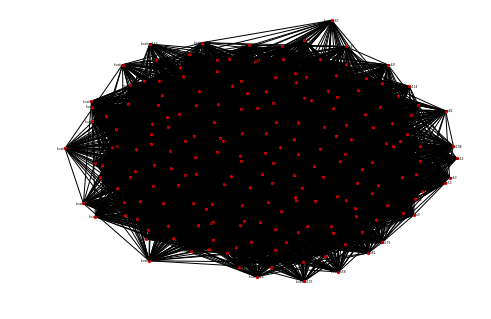

[[0.00000000e+00 7.01206598e+08 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.01206598e+08 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.70239319e+08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.59249115e+08
  6.50514175e+08 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 5.59249115e+08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.50514175e+08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.70239319e+08 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [145]:
def show_graph(adjacency_matrix, locations):
    labeldict = {i:label for i, label in enumerate(locations)}
    print(labeldict)
    rows, cols = np.where(adjacency_matrix != 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=5, labels=labeldict, with_labels = True, font_size=3)
    plt.show()

show_graph(g.edge_matrix, g.locations)
print(g.edge_matrix)